### 크롤링 

#### 웹의 구성 
* HTML : 웹페이지를 만들때 사용하는 언어 (집의 뼈대)
* CSS : 웹페이지를 꾸며줌
* JZ : 구체적인 기능 구현 

#### HTML 
* https://www.w3schools.com/ 에서 연습 가능 
* <html> 열기
    </html> 닫기 
    
#### Xpath : HTML의 경로 
* 웹페이지의 개발자 창에서 원하는 부분을 클릭 > copy > copy xpath를 통해 가져올 수 있음

# 0. 크롤링 가능여부 확인
* res.status_code : 200이면 정상, 200이 아닌 경우 불가능. 

In [3]:
import requests

In [5]:
# url 접속 
res=requests.get("https://www.naver.com/") 

In [7]:
#방법 1 ) 크롤링 불가능하면 error가 뜸 
res.raise_for_status()

In [6]:
# 200이면 정상_이후 동작 문제 없음
# 200이 아닌 경우_웹크롤링 불가능
print("응답코드 : ", res.status_code)                         

응답코드 :  200


In [5]:
res2=requests.get("https://nadocoding1.tistory.com")
print("응답코드 : ", res2.status_code)

응답코드 :  404


In [6]:
res.raise_for_status()
print("웹 크롤링을 진행합니다") # 크롤링이 가능한 경우에만 "웹 크롤링을 진행합니다"가 출력되고, 아닌 경우에는 에러코드와 함께 진행X

웹 크롤링을 진행합니다


'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
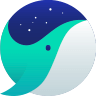
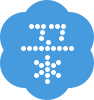

In [7]:
res.text # 네이버 html 문서 전체를 가져옵니다.

In [8]:
# 서버 html을 local 파일로 저장 
with open("mynaver.html","w",encoding="utf8") as f:
    f.write(res.text)

# 1. 네이버 뉴스_beautifulsoup

In [9]:
import requests  # 해당 url을 주고, 필요한 정보를 불러온다
from bs4 import BeautifulSoup 

In [11]:
#user agent는 구글에 'useragent string'을 검색해서 'what is my useragent'사이트에 들어가면 알 수 있습니다.
# 나는 로봇이 아닙니다_사이트 차단 방지
headers= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}

In [12]:
url="https://news.naver.com"     #뒤에 백슬레쉬 지워주고 진행하기 
res=requests.get(url,headers=headers)  # url로 htmㅣ 문서 가져오기 
res.raise_for_status()   #문제가 생기면 중단
soup=BeautifulSoup(res.text,"lxml")  #구문 분석 parser

(1) 기본 조작

In [14]:
# 웹크롤링 대상 페이지에 대해서 잘 모를 때
hh=soup.find("div", attrs={"class":"main_component droppable"}) # "class":"Nbtn_upload"인 첫번째 a element를 찾아줘
hh

<div class="main_component droppable" id="today_main_news">
<div class="com_header">
<h4 class="tit_h4 tit_main1"><strong>헤드라인 뉴스</strong></h4>
<p class="news_info_txt">헤드라인 뉴스와 각 기사묶음 타이틀은 기사 내용을 기반으로 <strong>자동 추출</strong>됩니다.</p>
</div>
<!-- [D] 구형: .com_list.com_list_headline, 이시각주요뉴스:.newsnow, 헤드라인뉴스:.hdline_news -->
<div class="hdline_news">
<div class="hdline_flick">
<div class="hdline_flick_item" style="display:block">
<a class="lnk_hdline_main_article nclicks('mai.image', '08138263_000000000000000005466671', 'airsGParam', '0', 'news_global_v2.0', 'qRDHFOfNOxIOYrKT')" href="/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=102&amp;oid=421&amp;aid=0005466671">
<img alt="원희룡 " height="190" onerror="javascript:this.src='https://ssl.pstatic.net/static.news/image/news/2009/noimage_300x190.png';" src="https://imgnews.pstatic.net/image/421/2021/07/08/0005466671_001_20210708170413453.jpg?type=nf300_190" width="300"/>
<div class="hdline_flick_mask">
<p class="hdline_flick_tit">원희룡 "여가부, 비판

In [23]:
print(hh.div) # hh 객체에서 첫번째로 발견되는 div element를 반환
print(hh.div.attrs)  # div element의 속성 출력
print(hh.div["class"]) # div element의 class 속성값 정보 출력

<div class="com_header">
<h4 class="tit_h4 tit_main1"><strong>헤드라인 뉴스</strong></h4>
<p class="news_info_txt">헤드라인 뉴스와 각 기사묶음 타이틀은 기사 내용을 기반으로 <strong>자동 추출</strong>됩니다.</p>
</div>
{'class': ['com_header']}
['com_header']


In [21]:
print(hh.strong) # html코드 전체 반환
print(hh.strong.get_text()) # 글자만 반환

<strong>헤드라인 뉴스</strong>
헤드라인 뉴스


(2) 기사제목 들고오기

In [24]:
lst = soup.find("ul",                                   #태그
                attrs={"class":"hdline_article_list"})  #속성
print(lst)

<ul class="hdline_article_list">
<li>
<div class="hdline_article_tit">
<a class="lnk_hdline_article nclicks('mai.text1', '880000F2_000000000000000003116687', 'airsGParam', '0', 'news_global_v2.0', 'qRDHFOfNOxIOYrKT')" href="/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=102&amp;oid=025&amp;aid=0003116687">
                                        서울대 민교협 “청소 노동자 사망 진상 규명” 촉구
                                    </a>
</div>
<div class="hdline_cluster_more">
<a class="lnk_hdline_cluster_more nclicks('mai.clu', '880000F2_000000000000000003116687', 'airsGParam', '0', 'news_global_v2.0', 'qRDHFOfNOxIOYrKT')" href="/main/clusterArticles.naver?id=c_202107061710_00001297&amp;mode=LSD&amp;mid=shm&amp;oid=025&amp;aid=0003116687">
<span class="blind">관련기사 개수</span>
<span class="cluster_more_icon_num">82</span>
</a>
</div>
</li>
<li>
<div class="hdline_article_tit">
<a class="lnk_hdline_article nclicks('mai.text1', '8800006F_000000000000000001454857', 'airsGParam', '0', 'news_global_v2.0', 'qRDHFOfN

In [25]:
news=lst.find_all("li")
news

[<li>
 <div class="hdline_article_tit">
 <a class="lnk_hdline_article nclicks('mai.text1', '880000F2_000000000000000003116687', 'airsGParam', '0', 'news_global_v2.0', 'qRDHFOfNOxIOYrKT')" href="/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=102&amp;oid=025&amp;aid=0003116687">
                                         서울대 민교협 “청소 노동자 사망 진상 규명” 촉구
                                     </a>
 </div>
 <div class="hdline_cluster_more">
 <a class="lnk_hdline_cluster_more nclicks('mai.clu', '880000F2_000000000000000003116687', 'airsGParam', '0', 'news_global_v2.0', 'qRDHFOfNOxIOYrKT')" href="/main/clusterArticles.naver?id=c_202107061710_00001297&amp;mode=LSD&amp;mid=shm&amp;oid=025&amp;aid=0003116687">
 <span class="blind">관련기사 개수</span>
 <span class="cluster_more_icon_num">82</span>
 </a>
 </div>
 </li>,
 <li>
 <div class="hdline_article_tit">
 <a class="lnk_hdline_article nclicks('mai.text1', '8800006F_000000000000000001454857', 'airsGParam', '0', 'news_global_v2.0', 'qRDHFOfNOxIOYrKT')" href

In [26]:
news=lst.find_all("li")
# news

for ns in news: 
    title= ns.find("a").get_text().strip()  #strip(): 불필요한 공백 제거
    link = url+ns.find("a")['href']
    
    print("기사제목: ", title) 
    print("(링크 :", link,")")

기사제목:  서울대 민교협 “청소 노동자 사망 진상 규명” 촉구
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=102&oid=025&aid=0003116687 )
기사제목:  12일부터 QR출입증으로 코로나19 백신 접종 인증
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=105&oid=005&aid=0001454857 )
기사제목:  아이티 경찰, 대통령 암살범과 총격전...4명 사살·2명 체포
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=104&oid=277&aid=0004934223 )
기사제목:  김건희 해명이 발단된 '논문' 논란..."기본도 못 갖춰"
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=052&aid=0001611638 )
기사제목:  긴급사태 속 도쿄 올림픽...'무관중' 가능성 커져
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=104&oid=052&aid=0001611457 )


# (+a) 네이버 영화 리뷰_beautifulsoup

다음 페이지로 넘어가는 자료.

처리하는데 여러 과정이 필요한 자료.

In [27]:
import requests  # 해당 url을 주고, 필요한 정보를 불러온다
from bs4 import BeautifulSoup 

In [28]:
headers= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}

In [38]:
url1="https://movie.naver.com/movie/bi/mi/review.nhn?code=194205&page=1"
res1=requests.get(url1,headers=headers)

(1) 기본

In [39]:
res1.text

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\t\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t \r\n\t\t\t\r\n\t\t\r\n\t\t\r\n\t\t\t\r\n\t\t\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta http-equiv="imagetoolbar" content="no">\r\n<title>발신제한 : 네이버 영화</title>\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\t\r\n\t\t\r\n\t\r\n\r\n\r\n\r\n<meta property="me2:image" content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" content="네이버영화 발신제한"/>\r\n<meta property="me2:category1" content="네이버영화"/>\r\n<meta property="me2:category2" content="발신제한"/>\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\t<meta property="og:title" content="발신제한"/>\r\n\t\r\n\r\n\r\n<meta property="og:type" content="article"/>\r\n\r\n<meta property="og:url" content="https://movie.naver.co

In [45]:
soup=BeautifulSoup(res1.text,"lxml") 
# 우리가 가져온 html문서를 lxml파서를 통해서 beautifulsoup 객체로 만든다. soup이 모든 정보를 가지고 있음

In [52]:
ul=soup.find("ul",attrs={"class":"rvw_list_area"})
ul

<ul class="rvw_list_area">
<li>
<a href="#" onclick="clickcr(this, 'rli.title', '', '', event); showReviewDetail(4785253)"><strong>2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]</strong></a>
<span class="user"><a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('4785253');">kw66****</a> <em>2021.06.28</em><em>추천 0</em></span>
<p><a href="#" onclick="clickcr(this, 'rli.content', '', '', event); showReviewDetail(4785253);">오늘 본 영화 발신제한 줄거리 &amp; 감상평 * [메가박스 목동]시놉시스 : 은행센터장 성규(조우진)는 아이들을 차에 태우고 출발한 평범한 출근길에 한 통의 발신번호 표시제한 전화를 받는다. 전화기 너머 의문의 목소리는 차에 폭탄이 ...</a></p>
</li>
<li>
<a href="#" onclick="clickcr(this, 'rli.title', '', '', event); showReviewDetail(4783459)"><strong>문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경</strong></a>
<span class="user"><a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('4783459');">pesu****</a> <em>2021.06.05</em><em>추천 0</em></span>
<p><a href="#" onclick="clickcr(this, 'rli.content', '', '', event); showReviewDeta

In [53]:
lis=ul.find_all("li") # ul에서 'li' tag를 가지는 것들을 모두 반환
lis

[<li>
 <a href="#" onclick="clickcr(this, 'rli.title', '', '', event); showReviewDetail(4785253)"><strong>2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]</strong></a>
 <span class="user"><a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('4785253');">kw66****</a> <em>2021.06.28</em><em>추천 0</em></span>
 <p><a href="#" onclick="clickcr(this, 'rli.content', '', '', event); showReviewDetail(4785253);">오늘 본 영화 발신제한 줄거리 &amp; 감상평 * [메가박스 목동]시놉시스 : 은행센터장 성규(조우진)는 아이들을 차에 태우고 출발한 평범한 출근길에 한 통의 발신번호 표시제한 전화를 받는다. 전화기 너머 의문의 목소리는 차에 폭탄이 ...</a></p>
 </li>,
 <li>
 <a href="#" onclick="clickcr(this, 'rli.title', '', '', event); showReviewDetail(4783459)"><strong>문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경</strong></a>
 <span class="user"><a href="#" onclick="clickcr(this, 'rli.uid', '', '', event); showReviewListByNid('4783459');">pesu****</a> <em>2021.06.05</em><em>추천 0</em></span>
 <p><a href="#" onclick="clickcr(this, 'rli.content', '', '', event); showReviewDetail(4783459);">   

(참고) for 구문

In [32]:
test_list = ['one', 'two', 'three'] 

for i in test_list: 
    print(i)

one
two
three


In [54]:
lis=ul.find_all("li")
for li in lis:
    reviews = li.find_all("strong") # li 에서 tag가 "strong"인 모든 element를 반환
    
    print(reviews)

[<strong>2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]</strong>]
[<strong>문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경</strong>]
[<strong>[영화감상] 발신제한 (HARD HIT, 2021)</strong>]
[<strong>영화 "발신제한"을 보고 </strong>]
[<strong>[예매권]&lt;발신제한&gt; 또야?!?! </strong>]
[<strong>발신제한 (HARD HIT)</strong>]
[<strong>[영화 발신제한 정보&amp;후기] 조우진 단독주연, 제네시스 GV80와 찍은 부산 폭탄스릴러(노스포일러 리뷰)</strong>]
[<strong>[CGV 정읍] 발신제한 - 관람후기</strong>]
[<strong>[발신제한] 어느 쪽이 더 큰 악인가</strong>]
[<strong>[영화 발신제한] 긴장감은 실종된 지루한 부산 시티투어</strong>]


In [55]:
for li in lis:
        reviews = li.find_all("strong") # li 에서 tag가 "strong"인 모든 element를 반환
        for review in reviews: 
            print(review.get_text())

2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]
문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경
[영화감상] 발신제한 (HARD HIT, 2021)
영화 "발신제한"을 보고 
[예매권]<발신제한> 또야?!?! 
발신제한 (HARD HIT)
[영화 발신제한 정보&후기] 조우진 단독주연, 제네시스 GV80와 찍은 부산 폭탄스릴러(노스포일러 리뷰)
[CGV 정읍] 발신제한 - 관람후기
[발신제한] 어느 쪽이 더 큰 악인가
[영화 발신제한] 긴장감은 실종된 지루한 부산 시티투어


In [56]:
len(lis)

10

(2) 모든 페이지에서 크롤링하는 법

(참고)f-string

In [57]:
for i in range (1,5):
    print(f"1학년 1반 {i}번")

1학년 1반 1번
1학년 1반 2번
1학년 1반 3번
1학년 1반 4번


In [58]:
# 모든 page에서 크롤링하는 법 

for i in range(1,5) : 
    url = 'https://movie.naver.com/movie/bi/mi/review.nhn?code=194205&page={}'.format(i)
    res = requests.get(url,headers = headers) 
    soup = BeautifulSoup(res.text, "lxml")
    lis=ul.find_all("li") 
    for li in lis:
        reviews = li.find_all("strong") # li 에서 tag가 "strong"인 모든 element를 반환
        for review in reviews: 
            print(review.get_text())

2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]
문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경
[영화감상] 발신제한 (HARD HIT, 2021)
영화 "발신제한"을 보고 
[예매권]<발신제한> 또야?!?! 
발신제한 (HARD HIT)
[영화 발신제한 정보&후기] 조우진 단독주연, 제네시스 GV80와 찍은 부산 폭탄스릴러(노스포일러 리뷰)
[CGV 정읍] 발신제한 - 관람후기
[발신제한] 어느 쪽이 더 큰 악인가
[영화 발신제한] 긴장감은 실종된 지루한 부산 시티투어
2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]
문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경
[영화감상] 발신제한 (HARD HIT, 2021)
영화 "발신제한"을 보고 
[예매권]<발신제한> 또야?!?! 
발신제한 (HARD HIT)
[영화 발신제한 정보&후기] 조우진 단독주연, 제네시스 GV80와 찍은 부산 폭탄스릴러(노스포일러 리뷰)
[CGV 정읍] 발신제한 - 관람후기
[발신제한] 어느 쪽이 더 큰 악인가
[영화 발신제한] 긴장감은 실종된 지루한 부산 시티투어
2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]
문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경
[영화감상] 발신제한 (HARD HIT, 2021)
영화 "발신제한"을 보고 
[예매권]<발신제한> 또야?!?! 
발신제한 (HARD HIT)
[영화 발신제한 정보&후기] 조우진 단독주연, 제네시스 GV80와 찍은 부산 폭탄스릴러(노스포일러 리뷰)
[CGV 정읍] 발신제한 - 관람후기
[발신제한] 어느 쪽이 더 큰 악인가
[영화 발신제한] 긴장감은 실종된 지루한 부산 시티투어
2021년 06월 25일 오후 02시 40분 [영화 발신제한 ♡]
문충추천영화_ 발신제한 _도심추격스릴러,협박테러_조우진,이재원,진경
[영화감상] 발신제한 (HARD HIT, 2021)
영화 "발신제한"을 보고 
[예매권]<발신제한> 또야?!?! 


# 2. 연세포탈 로그인_selenium

In [29]:
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from bs4 import BeautifulSoup
import time 

In [40]:
path ='C:\\Users\\User\\Desktop\\백업\\수현\\학업 외 활동\\DSL\\chromedriver_win32\\chromedriver' 
# 크롬 드라이버의 위치
browser = webdriver.Chrome(path)
# 크롬 웹 드라이버 객체 생성.
# 크롬드라이버로 크롬을 조작.

browser.get("https://portal.yonsei.ac.kr/main/")
# 드라이버 객체에서 원하는 url로 이동.

[기본 동작]

browser.back() # 뒤로 가기

browser.forward() # 앞으로 가기

browser.refresh() # 새로 고침

browser.quit() # 브라우저 종료

In [41]:
elem = browser.find_element_by_id("btnLogin")
elem.click()

In [45]:
# ID 입력
a = browser.find_element_by_id("loginId")
a.send_keys("2018122007")    #입력할때는 sned_keys사용
time.sleep(1)

In [46]:
# PW 입력
b = browser.find_element_by_id("loginPasswd")
b.send_keys("990410")
time.sleep(1)
c= browser.find_element_by_class_name("submit")
c.click()
time.sleep(3)

# 3. 네이버 항공권

In [48]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [49]:
browser = webdriver.Chrome(path)
# 크롬 웹 드라이버 객체 생성.
# 크롬드라이버로 크롬을 조작.
browser.maximize_window() # 창 최대화

url = "https://flight.naver.com/flights/"
browser.get(url) # url 로 이동

# 가는 날 선택 클릭
browser.find_element_by_link_text("가는날 선택").click()

# 이번달 27일, 28일 선택
# browser.find_elements_by_link_text("27")[0].click() # [0] -> 이번달
# browser.find_elements_by_link_text("28")[0].click() # [0] -> 이번달

# 다음달 27일, 28일 선택
# browser.find_elements_by_link_text("27")[1].click() # [1] -> 다음달
# browser.find_elements_by_link_text("28")[1].click() # [1] -> 다음달

# 이번달 27일, 다음달 28일 선택
browser.find_elements_by_link_text("27")[0].click() # [0] -> 이번달
browser.find_elements_by_link_text("28")[1].click() # [1] -> 다음달

# 제주도 선택
browser.find_element_by_xpath("//*[@id='recommendationList']/ul/li[1]").click()

# 항공권 검색 클릭
browser.find_element_by_link_text("항공권 검색").click()

try:
    elem = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.XPATH, "//*[@id='content']/div[2]/div/div[4]/ul/li[1]")))
    # 성공했을 때 동작 수행    
    print(elem.text) # 첫번째 결과 출력
finally:
    browser.quit()

# 첫번째 결과 출력
# elem = browser.find_element_by_xpath("//*[@id='content']/div[2]/div/div[4]/ul/li[1]")
# print(elem.text)


에어서울
출발지
GMP
06:00
도착지
CJU
07:00
총 소요시간
01시간 00분
할인석
편도 63,200원
편도 62,200원 (네이버페이 1,000원 적립)
성인이벤트혜택


# 과제 

(필수과제) 웹툰 '신의 탑'의 소제목+ 링크 크롤링

(선택과제) 네이버 웹툰 독립일기의 [경제]-[금융]파트의 뉴스 제목, 링크 가져오기